In [1]:
import modal

In [2]:
!modal setup

The web browser should have opened for you to authenticate and get an API token.
If it didn't, please copy this URL into your web browser manually:

]8;id=650230;https://modal.com/token-flow/tf-jiNGBW827RXRlDG0EAcUsQ\https://modal.com/token-flow/tf-jiNGBW827RXRlDG0EAcUsQ]8;;\

⠋ Waiting for authentication in the web browser
⠏ Waiting for token flow to complete... (attempt 4)
Web authentication finished successfully!
Token is connected to the vaishnavisree213 workspace.
Verifying token against https://api.modal.com
Token verified successfully!
⠋ Storing token
Token written to /Users/sreevaishnaviraobommena/.modal.toml in profile 
vaishnavisree213.


In [3]:
from hello import app, hello, hello_europe

In [4]:
with app.run():
    reply=hello.local()
reply

'Hello from Raleigh, North Carolina, US!!'

In [5]:
with app.run():
    reply=hello.remote()
reply

'Hello from Ashburn, Virginia, US!!'

In [6]:
with app.run():
    reply=hello_europe.remote()
reply

'Hello from Groningen, Groningen, NL!!'

In [7]:

from llama import app, generate

In [8]:
with modal.enable_output():
    with app.run():
        result=generate.remote("Life is a mystery, everyone must stand alone, I hear")
result

✓ Initialized. View run at 
https://modal.com/apps/vaishnavisree213/main/ap-zrUggSOiCii27lipbcqwHJ
⠋ Initializing...
⠸ Creating objects...objects...
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/llama.py
⠸ Creating objects...
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/llama.py
└── 🔨 Created function generate.
✓ Created objects.
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/llama.py
└── 🔨 Created function generate.
⠦ Worker assigned... View app at 
⠏ Worker assigned... View app at cqwHJ
⠹ Worker assigned... View app at cqwHJ
⠴ Running... View app at ii27lipbcqwHJ
⠏ Loading images (1 containers initializing)... View app at 
⠹ Loading images (1 containers initializing)... View app at 
⠴ Loading images (1 containers initializing)... View app at 
⠇ Loading images (1 containers initializing)... View app at 
⠹ Loading images (1 containers initializing)... View app at 


'<|begin_of_text|>Life is a mystery, everyone must stand alone, I hear you call my name,'

In [9]:
import modal
from pricer_ephemeral import app, price

In [10]:
with modal.enable_output():
    with app.run():
        result=price.remote("Quadcast HyperX condenser mic, connects via usb-c to your computer for crystal clear audio")
result

✓ Initialized. View run at 
https://modal.com/apps/vaishnavisree213/main/ap-K4Ni2z925UJp5DzeTq5g5y
⠋ Initializing...
⠸ Creating objects...objects...
└── ⠋ Creating mount 
    /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/pricer_ephemer
⠼ Creating objects...
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/pricer_ephemer
│   al.py
└── 🔨 Created function price.
✓ Created objects.
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/pricer_ephemer
│   al.py
└── 🔨 Created function price.
⠦ Worker assigned... View app at 
⠏ Running... View app at UJp5DzeTq5g5y
⠹ Loading images (1 containers initializing)... View app at 
⠦ Loading images (1 containers initializing)... View app at 
⠏ Loading images (1 containers initializing)... View app at 
⠹ Loading images (1 containers initializing)... View app at 
⠴ Loading images (1 containers initializing)... View app at 
⠇ Loading images (1 containers initializing).

133.0

In [11]:

!modal deploy -m pricer_service

⠸ Creating objects.....
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/pricer_service
│   .py
└── 🔨 Created function price.
✓ Created objects.
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/pricer_service
│   .py
└── 🔨 Created function price.
✓ App deployed in 0.507s! 🎉

View Deployment: 
https://modal.com/apps/vaishnavisree213/main/deployed/pricer-service


In [12]:
pricer = modal.Function.from_name("pricer-service", "price")

In [ ]:


pricer.remote("Quadcast HyperX condenser mic, connects via usb-c to your computer for crystal clear audio")

133.0

In [14]:
!modal deploy -m pricer_service2

⠸ Creating objects.....
└── ⠋ Creating mount 
    /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/pricer_service
⠼ Creating objects...
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/pricer_service
│   2.py
└── 🔨 Created function Pricer.*.
✓ Created objects.
├── 🔨 Created mount 
│   /Users/sreevaishnaviraobommena/projects/llm_engineering/week8/pricer_service
│   2.py
└── 🔨 Created function Pricer.*.
✓ App deployed in 0.714s! 🎉

View Deployment: 
https://modal.com/apps/vaishnavisree213/main/deployed/pricer-service


In [15]:
Pricer = modal.Cls.from_name("pricer-service", "Pricer")
pricer = Pricer()
reply = pricer.price.remote("Quadcast HyperX condenser mic, connects via usb-c to your computer for crystal clear audio")
print(reply)

133.0


In [16]:
from agents.specialist_agent import SpecialistAgent

In [17]:
agent = SpecialistAgent()
agent.price("iPhone 11 ")

500.0

In [1]:

import os
import re
import math
import json
from tqdm import tqdm
import random
from dotenv import load_dotenv
from huggingface_hub import login
import numpy as np
import pickle
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [2]:

load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')
DB = "products_vectorstore"

In [4]:
hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [5]:

from items import Item

In [6]:
with open('train.pkl', 'rb') as file:
    train = pickle.load(file)

In [7]:
train[0].prompt

'How much does this cost to the nearest dollar?\n\nDelphi FG0166 Fuel Pump Module\nDelphi brings 80 years of OE Heritage into each Delphi pump, ensuring quality and fitment for each Delphi part. Part is validated, tested and matched to the right vehicle application Delphi brings 80 years of OE Heritage into each Delphi assembly, ensuring quality and fitment for each Delphi part Always be sure to check and clean fuel tank to avoid unnecessary returns Rigorous OE-testing ensures the pump can withstand extreme temperatures Brand Delphi, Fit Type Vehicle Specific Fit, Dimensions LxWxH 19.7 x 7.7 x 5.1 inches, Weight 2.2 Pounds, Auto Part Position Unknown, Operation Mode Mechanical, Manufacturer Delphi, Model FUEL PUMP, Dimensions 19.7\n\nPrice is $227.00'

In [8]:
client = chromadb.PersistentClient(path=DB)

In [9]:
collection_name = "products"


existing_collection_names = [c.name for c in client.list_collections()]

if collection_name in existing_collection_names:
    client.delete_collection(collection_name)
    print(f"Deleted existing collection: {collection_name}")


collection = client.create_collection(collection_name)


Deleted existing collection: products


In [10]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [11]:

def description(item):
    text = item.prompt.replace("How much does this cost to the nearest dollar?\n\n", "")
    return text.split("\n\nPrice is $")[0]

In [12]:
description(train[0])

'Delphi FG0166 Fuel Pump Module\nDelphi brings 80 years of OE Heritage into each Delphi pump, ensuring quality and fitment for each Delphi part. Part is validated, tested and matched to the right vehicle application Delphi brings 80 years of OE Heritage into each Delphi assembly, ensuring quality and fitment for each Delphi part Always be sure to check and clean fuel tank to avoid unnecessary returns Rigorous OE-testing ensures the pump can withstand extreme temperatures Brand Delphi, Fit Type Vehicle Specific Fit, Dimensions LxWxH 19.7 x 7.7 x 5.1 inches, Weight 2.2 Pounds, Auto Part Position Unknown, Operation Mode Mechanical, Manufacturer Delphi, Model FUEL PUMP, Dimensions 19.7'

In [13]:
NUMBER_OF_DOCUMENTS = len(train)

#NUMBER_OF_DOCUMENTS = 20000 for faster process

for i in tqdm(range(0, NUMBER_OF_DOCUMENTS, 1000)):
    documents = [description(item) for item in train[i: i+1000]]
    vectors = model.encode(documents).astype(float).tolist()
    metadatas = [{"category": item.category, "price": item.price} for item in train[i: i+1000]]
    ids = [f"doc_{j}" for j in range(i, i+len(documents))]
    collection.add(
        ids=ids,
        documents=documents,
        embeddings=vectors,
        metadatas=metadatas
    )

100%|███████████████████████████████████████| 400/400 [1:34:36<00:00, 14.19s/it]


In [28]:
import os
import re
import math
import json
from tqdm import tqdm
import random
from dotenv import load_dotenv
from huggingface_hub import login
import matplotlib.pyplot as plt
import numpy as np
import pickle
from openai import OpenAI
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
from testing import Tester

In [29]:

load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')

In [31]:


hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: Environment variable`H

In [ ]:


from items import Item

In [33]:
openai = OpenAI()

In [ ]:


with open('test.pkl', 'rb') as file:
    test = pickle.load(file)

In [35]:
def make_context(similars, prices):
    message = "To provide some context, here are some other items that might be similar to the item you need to estimate.\n\n"
    for similar, price in zip(similars, prices):
        message += f"Potentially related product:\n{similar}\nPrice is ${price:.2f}\n\n"
    return message

In [36]:
def messages_for(item, similars, prices):
    system_message = "You estimate prices of items. Reply only with the price, no explanation"
    user_prompt = make_context(similars, prices)
    user_prompt += "And now the question for you:\n\n"
    user_prompt += item.test_prompt().replace(" to the nearest dollar","").replace("\n\nPrice is $","")
    return [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_prompt},
        {"role": "assistant", "content": "Price is $"}
    ]

In [37]:
DB = "products_vectorstore"

In [38]:
client = chromadb.PersistentClient(path=DB)
collection = client.get_or_create_collection('products')

In [39]:
def description(item):
    text = item.prompt.replace("How much does this cost to the nearest dollar?\n\n", "")
    return text.split("\n\nPrice is $")[0]

In [40]:
description(test[0])

"OEM AC Compressor w/A/C Repair Kit For Ford F150 F-150 V8 & Lincoln Mark LT 2007 2008 - BuyAutoParts NEW\nAs one of the world's largest automotive parts suppliers, our parts are trusted every day by mechanics and vehicle owners worldwide. This A/C Compressor and Components Kit is manufactured and tested to the strictest OE standards for unparalleled performance. Built for trouble-free ownership and 100% visually inspected and quality tested, this A/C Compressor and Components Kit is backed by our 100% satisfaction guarantee. Guaranteed Exact Fit for easy installation 100% BRAND NEW, premium ISO/TS 16949 quality - tested to meet or exceed OEM specifications Engineered for superior durability, backed by industry-leading unlimited-mileage warranty Included in this K"

In [41]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [42]:
def vector(item):
    return model.encode([description(item)])

In [43]:
def find_similars(item):
    results = collection.query(query_embeddings=vector(item).astype(float).tolist(), n_results=5)
    documents = results['documents'][0][:]
    prices = [m['price'] for m in results['metadatas'][0][:]]
    return documents, prices

In [44]:
print(test[1].prompt)

How much does this cost to the nearest dollar?

Motorcraft YB3125 Fan Clutch
Motorcraft YB3125 Fan Clutch Package Dimensions 25.146 cms (L) x 20.066 cms (W) x 15.494 cms (H) Package Quantity 1 Product Type Auto Part Country Of Origin China Manufacturer Motorcraft, Brand Motorcraft, Model Fan Clutch, Weight 5 pounds, Dimensions 10 x 7.63 x 6.25 inches, Country of Origin China, model number Exterior Painted, Manufacturer Part Rank Automotive Automotive Replacement Engine Fan Clutches 583, Domestic Shipping can be shipped within U.S., International Shipping This item can be shipped to select countries outside of the U.S. Learn More, Available October 10, 2007

Price is $225.00


In [45]:
documents, prices = find_similars(test[1])

In [46]:
print(make_context(documents, prices))

To provide some context, here are some other items that might be similar to the item you need to estimate.

Potentially related product:
Motorcraft Fan Clutch Assembly - YB3130
Motorcraft Fan Clutch Assembly - YB3130 Package Dimensions 7.23 L x 4 H x 6.92 W (inches) Package Weight 5 pounds Country of Origin China Part Number YB3130 Manufacturer Motorcraft, Brand Motorcraft, Model Fan Clutch Assembly, Weight 5 pounds, Dimensions 6.87 x 7.32 x 5.62 inches, Country of Origin China, model number Exterior Painted, Manufacturer Part Wattage 6.92 watts, Rank Automotive Automotive Replacement Engine Fan Clutches 698, Available October 10, 2007, Dimensions LxWxH 6.87 x 7.32 x 5.62 inches
Price is $223.78

Potentially related product:
Motorcraft- YB3126 Fan Clutch
Fan Clutch Package Dimensions 16.764 H x 24.384 L x 20.32 W (centimeters) Part number YB3126 Package Weight 7.4 pounds Fit type Vehicle Specific Brand Motorcraft, Electric fan design Blower, Power Source Electric, Style Modern, Dimensi

In [47]:
print(messages_for(test[1], documents, prices))

[{'role': 'system', 'content': 'You estimate prices of items. Reply only with the price, no explanation'}, {'role': 'user', 'content': 'To provide some context, here are some other items that might be similar to the item you need to estimate.\n\nPotentially related product:\nMotorcraft Fan Clutch Assembly - YB3130\nMotorcraft Fan Clutch Assembly - YB3130 Package Dimensions 7.23 L x 4 H x 6.92 W (inches) Package Weight 5 pounds Country of Origin China Part Number YB3130 Manufacturer Motorcraft, Brand Motorcraft, Model Fan Clutch Assembly, Weight 5 pounds, Dimensions 6.87 x 7.32 x 5.62 inches, Country of Origin China, model number Exterior Painted, Manufacturer Part Wattage 6.92 watts, Rank Automotive Automotive Replacement Engine Fan Clutches 698, Available October 10, 2007, Dimensions LxWxH 6.87 x 7.32 x 5.62 inches\nPrice is $223.78\n\nPotentially related product:\nMotorcraft- YB3126 Fan Clutch\nFan Clutch Package Dimensions 16.764 H x 24.384 L x 20.32 W (centimeters) Part number YB31

In [48]:
def get_price(s):
    s = s.replace('$','').replace(',','')
    match = re.search(r"[-+]?\d*\.\d+|\d+", s)
    return float(match.group()) if match else 0

In [49]:
get_price("The price for this is $99.99")

99.99

In [50]:

def gpt_4o_mini_rag(item):
    documents, prices = find_similars(item)
    response = openai.chat.completions.create(
        model="gpt-4o-mini", 
        messages=messages_for(item, documents, prices),
        seed=42,
        max_tokens=5
    )
    reply = response.choices[0].message.content
    return get_price(reply)

In [51]:
gpt_4o_mini_rag(test[1])

198.45

In [52]:
test[1].price

225.11

1: Guess: $312.41 Truth: $374.41 Error: $62.00 SLE: 0.03 Item: OEM AC Compressor w/A/C Repair Kit For F...
2: Guess: $198.45 Truth: $225.11 Error: $26.66 SLE: 0.02 Item: Motorcraft YB3125 Fan Clutch
3: Guess: $44.99 Truth: $61.68 Error: $16.69 SLE: 0.10 Item: Dorman 603-159 Front Washer Fluid Reserv...
4: Guess: $379.99 Truth: $599.99 Error: $220.00 SLE: 0.21 Item: HP Premium 17.3-inch HD Plus Touchscreen...
5: Guess: $16.95 Truth: $16.99 Error: $0.04 SLE: 0.00 Item: 5-Position Super Switch Pickup Selector ...
6: Guess: $12.99 Truth: $31.99 Error: $19.00 SLE: 0.74 Item: Horror Bookmarks, Resin Horror Bookmarks...
7: Guess: $68.99 Truth: $101.79 Error: $32.80 SLE: 0.15 Item: SK6241 - Stinger 4 Gauge 6000 Series Pow...
8: Guess: $399.00 Truth: $289.00 Error: $110.00 SLE: 0.10 Item: Godox ML60Bi LED Light Kit, Handheld LED...
9: Guess: $699.99 Truth: $635.86 Error: $64.13 SLE: 0.01 Item: Randall RG75DG3PLUS G3 Plus 100-Watt Com...
10: Guess: $79.99 Truth: $65.99 Error: $14.00 SLE: 0.04 It

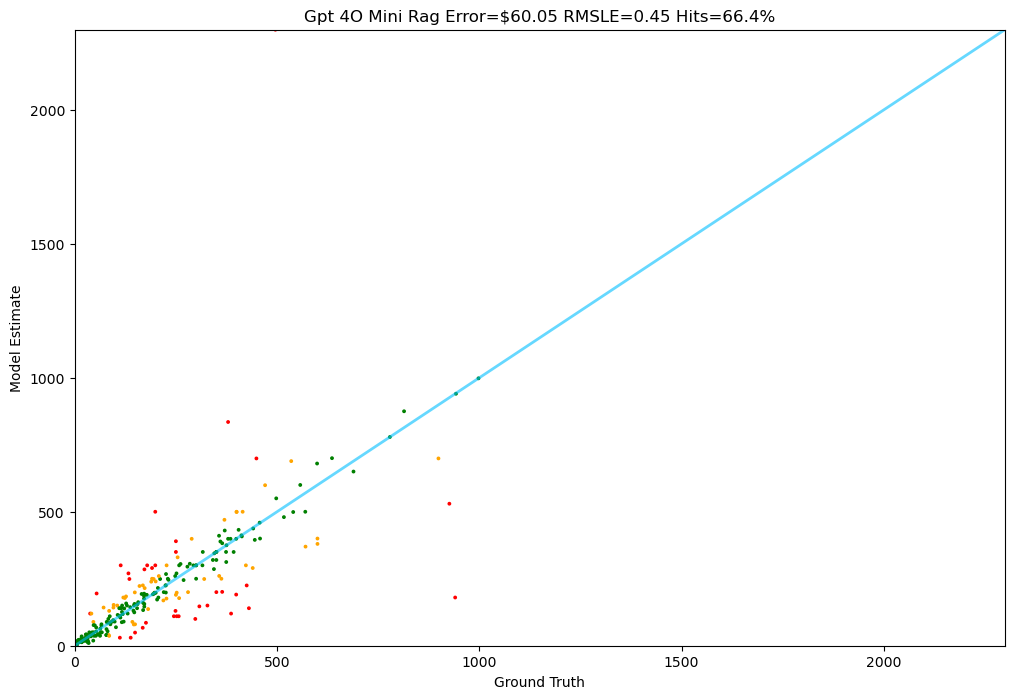

In [53]:
Tester.test(gpt_4o_mini_rag, test)

In [54]:
from agents.frontier_agent import FrontierAgent

In [55]:
import logging
root = logging.getLogger()
root.setLevel(logging.INFO)

In [56]:
agent = FrontierAgent(collection)

INFO:root:[Frontier Agent] Initializing Frontier Agent
INFO:root:[Frontier Agent] Frontier Agent is setting up with OpenAI
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: mps
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
INFO:root:[Frontier Agent] Frontier Agent is ready


In [57]:
agent.price("Quadcast HyperX condenser mic for high quality podcasting")

INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-4o-mini with context including 5 similar products
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $139.99


139.99

In [58]:
from agents.specialist_agent import SpecialistAgent

In [59]:
agent2 = SpecialistAgent()

INFO:root:[Specialist Agent] Specialist Agent is initializing - connecting to modal
INFO:root:[Specialist Agent] Specialist Agent is ready


In [60]:
agent2.price("Quadcast HyperX condenser mic for high quality podcasting")

INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model
INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00


189.0

In [1]:

import os
import re
import math
import json
from tqdm import tqdm
import random
from dotenv import load_dotenv
from huggingface_hub import login
import numpy as np
import pickle
from openai import OpenAI
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
from items import Item
from testing import Tester
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [2]:
QUESTION = "How much does this cost to the nearest dollar?\n\n"
DB = "products_vectorstore"

In [3]:
load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')

In [5]:
hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [6]:
from items import Item

In [7]:
with open('test.pkl', 'rb') as file:
    test = pickle.load(file)

In [8]:
client = chromadb.PersistentClient(path=DB)
collection = client.get_or_create_collection('products')

In [9]:
result = collection.get(include=['embeddings', 'documents', 'metadatas'])
vectors = np.array(result['embeddings'])
documents = result['documents']
prices = [metadata['price'] for metadata in result['metadatas']]

# Random Forest





In [10]:


rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(vectors, prices)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [12]:
rf_model = joblib.load('random_forest_model.pkl')

In [13]:
from agents.specialist_agent import SpecialistAgent
from agents.frontier_agent import FrontierAgent
from agents.random_forest_agent import RandomForestAgent

In [14]:
specialist = SpecialistAgent()
frontier = FrontierAgent(collection)
random_forest = RandomForestAgent()

In [15]:
def description(item):
    return item.prompt.split("to the nearest dollar?\n\n")[1].split("\n\nPrice is $")[0]

In [16]:
def rf(item):
    return random_forest.price(description(item))

1: Guess: $298.17 Truth: $374.41 Error: $76.24 SLE: 0.05 Item: OEM AC Compressor w/A/C Repair Kit For F...
2: Guess: $208.93 Truth: $225.11 Error: $16.18 SLE: 0.01 Item: Motorcraft YB3125 Fan Clutch
3: Guess: $214.62 Truth: $61.68 Error: $152.94 SLE: 1.53 Item: Dorman 603-159 Front Washer Fluid Reserv...
4: Guess: $363.68 Truth: $599.99 Error: $236.31 SLE: 0.25 Item: HP Premium 17.3-inch HD Plus Touchscreen...
5: Guess: $213.33 Truth: $16.99 Error: $196.34 SLE: 6.14 Item: 5-Position Super Switch Pickup Selector ...
6: Guess: $55.46 Truth: $31.99 Error: $23.47 SLE: 0.29 Item: Horror Bookmarks, Resin Horror Bookmarks...
7: Guess: $264.99 Truth: $101.79 Error: $163.20 SLE: 0.90 Item: SK6241 - Stinger 4 Gauge 6000 Series Pow...
8: Guess: $243.83 Truth: $289.00 Error: $45.17 SLE: 0.03 Item: Godox ML60Bi LED Light Kit, Handheld LED...
9: Guess: $285.82 Truth: $635.86 Error: $350.04 SLE: 0.64 Item: Randall RG75DG3PLUS G3 Plus 100-Watt Com...
10: Guess: $170.20 Truth: $65.99 Error: $104.21 SLE

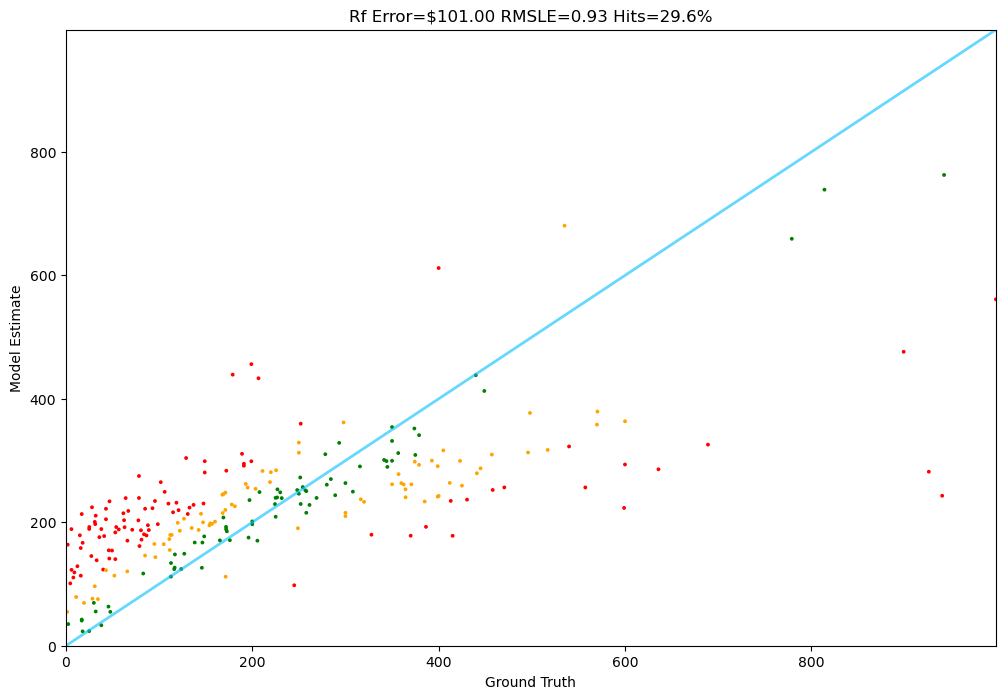

In [17]:
Tester.test(rf, test)

In [18]:
product = "Quadcast HyperX condenser mic for high quality audio for podcasting"

In [19]:
print(specialist.price(product))
print(frontier.price(product))
print(random_forest.price(product))

189.0
139.99
260.04250000000013


In [20]:
specialists = []
frontiers = []
random_forests = []
prices = []
for item in tqdm(test[1000:1250]):
    text = description(item)
    specialists.append(specialist.price(text))
    frontiers.append(frontier.price(text))
    random_forests.append(random_forest.price(text))
    prices.append(item.price)

100%|█████████████████████████████████████████| 250/250 [10:40<00:00,  2.56s/it]


In [22]:
mins = [min(s,f,r) for s,f,r in zip(specialists, frontiers, random_forests)]
maxes = [max(s,f,r) for s,f,r in zip(specialists, frontiers, random_forests)]

X = pd.DataFrame({
    'Specialist': specialists,
    'Frontier': frontiers,
    'RandomForest': random_forests,
    'Min': mins,
    'Max': maxes,
})
y = pd.Series(prices)

In [23]:
np.random.seed(42)

lr = LinearRegression()
lr.fit(X, y)

feature_columns = X.columns.tolist()

for feature, coef in zip(feature_columns, lr.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept={lr.intercept_:.2f}")

Specialist: 0.40
Frontier: 0.16
RandomForest: -0.47
Min: 0.49
Max: 0.40
Intercept=29.51


In [24]:
joblib.dump(lr, 'ensemble_model.pkl')

['ensemble_model.pkl']

In [25]:
from agents.ensemble_agent import EnsembleAgent
ensemble = EnsembleAgent(collection)

In [26]:
ensemble.price(product)

176.30585541495785

In [27]:
def ensemble_pricer(item):
    return max(0,ensemble.price(description(item)))

1: Guess: $412.09 Truth: $374.41 Error: $37.68 SLE: 0.01 Item: OEM AC Compressor w/A/C Repair Kit For F...
2: Guess: $207.12 Truth: $225.11 Error: $17.99 SLE: 0.01 Item: Motorcraft YB3125 Fan Clutch
3: Guess: $48.61 Truth: $61.68 Error: $13.07 SLE: 0.05 Item: Dorman 603-159 Front Washer Fluid Reserv...
4: Guess: $380.08 Truth: $599.99 Error: $219.91 SLE: 0.21 Item: HP Premium 17.3-inch HD Plus Touchscreen...
5: Guess: $32.62 Truth: $16.99 Error: $15.63 SLE: 0.39 Item: 5-Position Super Switch Pickup Selector ...
6: Guess: $41.45 Truth: $31.99 Error: $9.46 SLE: 0.06 Item: Horror Bookmarks, Resin Horror Bookmarks...
7: Guess: $107.72 Truth: $101.79 Error: $5.93 SLE: 0.00 Item: SK6241 - Stinger 4 Gauge 6000 Series Pow...
8: Guess: $374.99 Truth: $289.00 Error: $85.99 SLE: 0.07 Item: Godox ML60Bi LED Light Kit, Handheld LED...
9: Guess: $900.87 Truth: $635.86 Error: $265.01 SLE: 0.12 Item: Randall RG75DG3PLUS G3 Plus 100-Watt Com...
10: Guess: $77.75 Truth: $65.99 Error: $11.76 SLE: 0.03 It

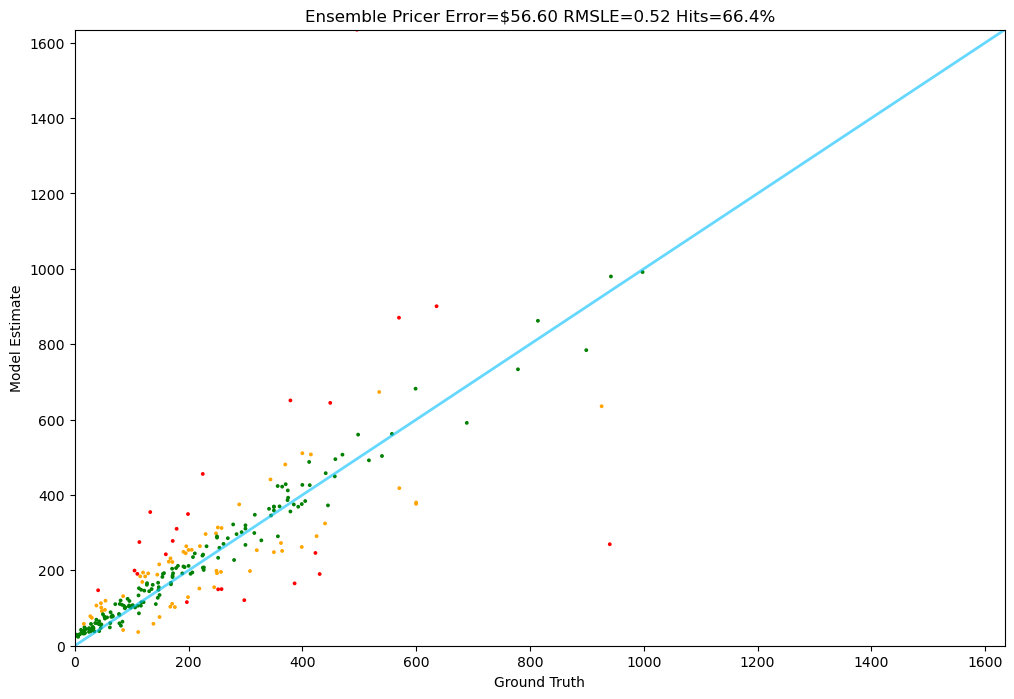

In [28]:
Tester.test(ensemble_pricer, test)

In [1]:
import os
import json
from dotenv import load_dotenv
from openai import OpenAI
from agents.deals import ScrapedDeal, DealSelection

In [2]:


load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
MODEL = 'gpt-4o-mini'
openai = OpenAI()

In [3]:
deals = ScrapedDeal.fetch(show_progress=True)

100%|█████████████████████████████████████████████| 5/5 [00:51<00:00, 10.31s/it]


In [4]:
len(deals)

50

In [5]:
deals[44].describe()

'Title: SucceBuy Gas Pressure Washer for $180 + free shipping\nDetails: Get a total savings of $293 with coupon code "AEUS32". Buy Now at AliExpress\nFeatures: max 3,600-PSI 2.6 GPM extension wand and 5 nozzles 7HP engine\nURL: https://www.dealnews.com/Succe-Buy-Gas-Pressure-Washer-for-180-free-shipping/21759808.html?iref=rss-c196'

In [6]:
system_prompt = """You identify and summarize the 5 most detailed deals from a list, by selecting deals that have the most detailed, high quality description and the most clear price.
Respond strictly in JSON with no explanation, using this format. You should provide the price as a number derived from the description. If the price of a deal isn't clear, do not include that deal in your response.
Most important is that you respond with the 5 deals that have the most detailed product description with price. It's not important to mention the terms of the deal; most important is a thorough description of the product.
Be careful with products that are described as "$XXX off" or "reduced by $XXX" - this isn't the actual price of the product. Only respond with products when you are highly confident about the price. 

{"deals": [
    {
        "product_description": "Your clearly expressed summary of the product in 4-5 sentences. Details of the item are much more important than why it's a good deal. Avoid mentioning discounts and coupons; focus on the item itself. There should be a paragpraph of text for each item you choose.",
        "price": 99.99,
        "url": "the url as provided"
    },
    ...
]}"""

In [7]:
user_prompt = """Respond with the most promising 5 deals from this list, selecting those which have the most detailed, high quality product description and a clear price.
Respond strictly in JSON, and only JSON. You should rephrase the description to be a summary of the product itself, not the terms of the deal.
Remember to respond with a paragraph of text in the product_description field for each of the 5 items that you select.
Be careful with products that are described as "$XXX off" or "reduced by $XXX" - this isn't the actual price of the product. Only respond with products when you are highly confident about the price. 

Deals:

"""
user_prompt += '\n\n'.join([deal.describe() for deal in deals])

In [8]:
print(user_prompt[:2000])

Respond with the most promising 5 deals from this list, selecting those which have the most detailed, high quality product description and a clear price.
Respond strictly in JSON, and only JSON. You should rephrase the description to be a summary of the product itself, not the terms of the deal.
Remember to respond with a paragraph of text in the product_description field for each of the 5 items that you select.
Be careful with products that are described as "$XXX off" or "reduced by $XXX" - this isn't the actual price of the product. Only respond with products when you are highly confident about the price. 

Deals:

Title: Best Buy Clearance Electronics: Up to 85% off + free shipping
Details: Find over 1,600 deeply discounted items in Best Buy's clearance section, including computers and accessories, appliances, cell phones, TVs, and more. We've pictured the Samsung QN90C 65" 4K HDR QLED UHD Smart TV for $339.99 ($1,360 off). My Best Buy members get free shipping (it's free to join). 

In [9]:
def get_recommendations():
    completion = openai.beta.chat.completions.parse(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
      ],
        response_format=DealSelection
    )
    result = completion.choices[0].message.parsed
    return result

In [11]:
result = get_recommendations()

In [12]:
len(result.deals)

5

In [13]:
result.deals[1]

Deal(product_description='The Roku Plus Series 75R6A5R is a 75" 4K HDR QLED UHD Smart TV that brings a massive screen size with crystal-clear visuals to your viewing experience. It features Dolby Vision and HDR10+ technologies to enhance color and contrast for vibrant and lifelike images. This smart TV operates on the user-friendly RokuOS, which is compatible with voice assistants like Alexa for seamless integration into your smart home. Perfect for movie nights or gaming marathons, this TV provides an excellent way to enjoy entertainment.', price=500.0, url='https://www.dealnews.com/products/Roku/Roku-Plus-Series-75-R6-A5-R-75-4-K-HDR-QLED-UHD-Smart-TV/493096.html?iref=rss-c142')

In [14]:
from agents.scanner_agent import ScannerAgent

In [15]:
agent = ScannerAgent()
result = agent.scan()

In [16]:
result

DealSelection(deals=[Deal(product_description='The Samsung QN90C is a stunning 65" 4K HDR QLED UHD Smart TV that delivers brilliant visuals and rich colors for an immersive viewing experience. It features advanced Quantum Dot technology, enabling vibrant and accurate color reproduction, while the HDR support enhances contrasts for darker blacks and brighter whites. With its smart capabilities, you can easily access popular streaming services and control your TV with voice commands, making it a perfect centerpiece for any entertainment setup.', price=339.99, url='https://www.dealnews.com/Best-Buy-Clearance-Electronics-Up-to-85-off-free-shipping/21761792.html?iref=rss-c142'), Deal(product_description='The Roku Plus Series 75R6A5R is a massive 75" 4K HDR QLED UHD Smart TV that offers an impressive home theater experience with Dolby Vision and HDR10+ for stunning picture quality. Running on RokuOS, it seamlessly integrates with Alexa for voice control and features an intuitive interface fo

In [1]:
from dotenv import load_dotenv
from agents.messaging_agent import MessagingAgent

In [2]:
load_dotenv(override=True)
DB = "products_vectorstore"

In [3]:
agent = MessagingAgent()

In [8]:
agent.push("BIG NEWS!!!")

In [9]:
import chromadb
DB = "products_vectorstore"
client = chromadb.PersistentClient(path=DB)
collection = client.get_or_create_collection('products')
from agents.planning_agent import PlanningAgent

In [10]:
planner = PlanningAgent(collection)

In [11]:
planner.plan()

Opportunity(deal=Deal(product_description='The Garmin Fenix 7X Sapphire Solar GPS Smartwatch is a high-performance smartwatch equipped with a solar-powered display, ensuring extended battery life of up to 28 days in smartwatch mode. It features multi-band GPS support for accurate navigation in a range of environments, and comprehensive health tracking capabilities, including 24/7 heart rate monitoring and sleep tracking. The device comes bundled with global maps for navigation, making it an all-encompassing tool for outdoor enthusiasts and fitness aficionados.', price=500.0, url='https://www.dealnews.com/products/Garmin/Garmin-Fenix-7-X-Sapphire-Solar-GPS-Smartwatch/493064.html?iref=rss-c142'), estimate=803.3156714867911, discount=303.3156714867911)

In [1]:
import gradio as gr
from deal_agent_framework import DealAgentFramework
from agents.deals import Opportunity, Deal

In [3]:
with gr.Blocks(title="Find your deals", fill_width=True) as ui:

    with gr.Row():
        gr.Markdown('<div style="text-align: center;font-size:24px">SmartPrice AI: Multi-Agent System for Automated Deal Discovery</div>')
    with gr.Row():
        gr.Markdown('<div style="text-align: center;font-size:14px">Autonomous agent framework for intelligent deal discovery, combining a fine-tuned LLM deployed on Modal with a frontier-driven RAG pipeline and Chroma vector store.</div>')
        

ui.launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


In [4]:

with gr.Blocks(title="The Price is Right", fill_width=True) as ui:

    initial_deal = Deal(product_description="Example description", price=100.0, url="https://cnn.com")
    initial_opportunity = Opportunity(deal=initial_deal, estimate=200.0, discount=100.0)
    opportunities = gr.State([initial_opportunity])

    def get_table(opps):
        return [[opp.deal.product_description, opp.deal.price, opp.estimate, opp.discount, opp.deal.url] for opp in opps]

    with gr.Row():
        gr.Markdown('<div style="text-align: center;font-size:24px">"The Price is Right" - Deal Hunting Agentic AI</div>')
    with gr.Row():
        gr.Markdown('<div style="text-align: center;font-size:14px">Deals surfaced so far:</div>')
    with gr.Row():
        opportunities_dataframe = gr.Dataframe(
            headers=["Description", "Price", "Estimate", "Discount", "URL"],
            wrap=True,
            column_widths=[4, 1, 1, 1, 2],
            row_count=10,
            col_count=5,
            max_height=400,
        )

    ui.load(get_table, inputs=[opportunities], outputs=[opportunities_dataframe])

ui.launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


In [5]:
agent_framework = DealAgentFramework()
agent_framework.init_agents_as_needed()

with gr.Blocks(title="The Price is Right", fill_width=True) as ui:

    initial_deal = Deal(product_description="Example description", price=100.0, url="https://cnn.com")
    initial_opportunity = Opportunity(deal=initial_deal, estimate=200.0, discount=100.0)
    opportunities = gr.State([initial_opportunity])

    def get_table(opps):
        return [[opp.deal.product_description, opp.deal.price, opp.estimate, opp.discount, opp.deal.url] for opp in opps]

    def do_select(opportunities, selected_index: gr.SelectData):
        row = selected_index.index[0]
        opportunity = opportunities[row]
        agent_framework.planner.messenger.alert(opportunity)

    with gr.Row():
        gr.Markdown('<div style="text-align: center;font-size:24px">"The Price is Right" - Deal Hunting Agentic AI</div>')
    with gr.Row():
        gr.Markdown('<div style="text-align: center;font-size:14px">Deals surfaced so far:</div>')
    with gr.Row():
        opportunities_dataframe = gr.Dataframe(
            headers=["Description", "Price", "Estimate", "Discount", "URL"],
            wrap=True,
            column_widths=[4, 1, 1, 1, 2],
            row_count=10,
            col_count=5,
            max_height=400,
        )

    ui.load(get_table, inputs=[opportunities], outputs=[opportunities_dataframe])
    opportunities_dataframe.select(do_select, inputs=[opportunities], outputs=[])

ui.launch(inbrowser=True)

[2025-08-23 20:45:52 -0400] [Agents] [INFO] Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Agent Framework] Initializing Agent Framework
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Planning Agent] Planning Agent is initializing
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Scanner Agent] Scanner Agent is initializing
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Scanner Agent] Scanner Agent is ready
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Ensemble Agent] Initializing Ensemble Agent
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Specialist Agent] Specialist Agent is initializing - connecting to modal
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Specialist Agent] Specialist Agent is ready
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Frontier Agent] Initializing Frontier Agent
[2025-08-23 20:45:53 -0400] [Agents] [INFO] [Frontier Agent] Frontier Agent is setting up with OpenAI


[2025-08-23 20:45:57 -0400] [Agents] [INFO] HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"


In [ ]:
!python price_is_right_final.py